# Load the tests to compare

In [19]:
%matplotlib inline
import os
import sys
import json
import pickle
import pandas as pd

# get an absolute path to the directory that contains parent files
project_dir = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(project_dir, '..', '..')))

from experiments.utils.constants import TESTS_RESULTS_PATH
series = 12
start_test = 0
end_test = 9
tests_ids = [i for i in range(start_test, end_test)]
tests_names = [i for i in range(start_test, end_test)]

tests = {}


for test_id, test_name in zip(tests_ids, tests_names):
    test_path = os.path.join(
        TESTS_RESULTS_PATH,
        'series',
        str(series),
        'tests',
        str(test_id))
    with open(os.path.join(test_path, 'info.json')) as cf:
        info = json.loads(cf.read())
    with open(os.path.join(test_path, 'episodes.pickle'), 'rb') as input_file:
        episodes = pickle.load(input_file)
    tests.update({test_name: {
        'info': info,
        'episodes': episodes
    }})
test_types = [test['info']['algorithm'] for _, test in tests.items()]
print("availeble tests:\n {}\ntests_types:\n {}".format(
    list(tests.keys()),
    test_types))

availeble tests:
 [0, 1, 2, 3, 4, 5, 6, 7, 8]
tests_types:
 ['PG', 'PG', 'PG', 'PPO', 'PPO', 'IMPALA', 'IMPALA', 'IMPALA', 'PPO']


# All Stats of a test

In [20]:
test_id = 0
episdoe_id = 0
print(f'tests entry structure:\n{tests[test_id].keys()}')
print(f"tests entry info structure:\n{tests[test_id]['info'].keys()}")
print(f"tests entry episodes info:\n{tests[test_id]['episodes'][episdoe_id].columns}")

tests entry structure:
dict_keys(['info', 'episodes'])
tests entry info structure:
dict_keys(['type_env', 'series', 'cluster_id', 'workload_id', 'checkpoint', 'experiment_str', 'experiments', 'episode_length', 'num_episodes', 'algorithm', 'penalty_consolidated', 'num_workers'])
tests entry episodes info:
Index(['action', 'raw_obs', 'num_consolidated', 'num_overloaded',
       'scheduling_timestep', 'scheduling_success', 'reward_illegal',
       'reward_u', 'reward_c', 'reward_cv', 'reward_v', 'reward_g', 'reward_p',
       'u', 'c', 'cv', 'v', 'g', 'p', 'reward'],
      dtype='object')


# Extracting necessary stats of all tests

In [21]:
final_stats = []
for test_id in range(start_test, end_test):
    # TODO check for correctness
    num_consolidated_episodes_average = [episode['num_consolidated'].mean() for episode in tests[test_id]['episodes']]
    num_consolidated_test_average = sum(num_consolidated_episodes_average) / len(num_consolidated_episodes_average)

    num_overloaded_episodes_average = [episode['num_overloaded'].mean() for episode in tests[test_id]['episodes']]
    num_overloaded_test_average = sum(num_overloaded_episodes_average) / len(num_overloaded_episodes_average)

    scheduling_success_episodes_average = [episode['scheduling_success'].mean() for episode in tests[test_id]['episodes']]
    scheduling_success_test_average = sum(scheduling_success_episodes_average) / len(scheduling_success_episodes_average)

    reward_illegal_episodes_average = [episode['reward_illegal'].mean() for episode in tests[test_id]['episodes']]
    reward_illegal_test_average = sum(reward_illegal_episodes_average) / len(reward_illegal_episodes_average)

    reward_u_episodes_average = [episode['reward_u'].mean() for episode in tests[test_id]['episodes']]
    reward_u_test_average = sum(reward_u_episodes_average) / len(reward_u_episodes_average)

    reward_c_episodes_average = [episode['reward_c'].mean() for episode in tests[test_id]['episodes']]
    reward_c_test_average = sum(reward_c_episodes_average) / len(reward_c_episodes_average)

    reward_v_episodes_average = [episode['reward_v'].mean() for episode in tests[test_id]['episodes']]
    reward_v_test_average = sum(reward_v_episodes_average) / len(reward_v_episodes_average)

    reward_cv_episodes_average = [episode['reward_cv'].mean() for episode in tests[test_id]['episodes']]
    reward_cv_test_average = sum(reward_cv_episodes_average) / len(reward_cv_episodes_average)

    reward_g_episodes_average = [episode['reward_g'].mean() for episode in tests[test_id]['episodes']]
    reward_g_test_average = sum(reward_g_episodes_average) / len(reward_g_episodes_average)

    reward_p_episodes_average = [episode['reward_p'].mean() for episode in tests[test_id]['episodes']]
    reward_p_test_average = sum(reward_p_episodes_average) / len(reward_p_episodes_average)

    u_episodes_average = [episode['u'].mean() for episode in tests[test_id]['episodes']]
    u_test_average = sum(u_episodes_average) / len(u_episodes_average)

    c_episodes_average = [episode['c'].mean() for episode in tests[test_id]['episodes']]
    c_test_average = sum(c_episodes_average) / len(c_episodes_average)

    v_episodes_average = [episode['v'].mean() for episode in tests[test_id]['episodes']]
    v_test_average = sum(v_episodes_average) / len(v_episodes_average)

    cv_episodes_average = [episode['cv'].mean() for episode in tests[test_id]['episodes']]
    cv_test_average = sum(cv_episodes_average) / len(cv_episodes_average)

    g_episodes_average = [episode['g'].mean() for episode in tests[test_id]['episodes']]
    g_test_average = sum(g_episodes_average) / len(g_episodes_average)

    p_episodes_average = [episode['p'].mean() for episode in tests[test_id]['episodes']]
    p_test_average = sum(p_episodes_average) / len(p_episodes_average)

    reward_episodes_average = [episode['reward'].mean() for episode in tests[test_id]['episodes']]
    reward_test_average = sum(reward_episodes_average) / len(reward_episodes_average)


    final_stats.append({
        'test_id': test_id,
        'checkpoint': tests[test_id]['info']['checkpoint'],
        # TODO where is workload id
        'workload_id': tests[test_id]['info']['workload_id'],
        'experiments': tests[test_id]['info']['experiments'],
        'episode_length': tests[test_id]['info']['episode_length'],
        'num_episodes': tests[test_id]['info']['num_episodes'],
        'penalalty_consolidated': tests[test_id]['info']['penalty_consolidated'],
        'num_consolidated_test_average': num_consolidated_test_average,
        'num_overloaded_test_average': num_overloaded_test_average,
        'scheduling_success_test_average': scheduling_success_test_average,
        'reward_illegal_test_average': reward_illegal_test_average,
        'reward_u_test_average': reward_u_test_average,
        'reward_v_test_average': reward_v_test_average,
        'reward_cv_test_average': reward_cv_test_average,
        'reward_g_test_average': reward_g_test_average,
        'reward_p_test_average': reward_p_test_average,
        'u_test_average': u_test_average,
        'v_test_average': v_test_average,
        'cv_test_average': cv_test_average,
        'g_test_average': g_test_average,
        'p_test_average': p_test_average,
        'reward_test_average': reward_test_average
    })

final_stats_df = pd.DataFrame(final_stats)
final_stats_df['test_types'] = test_types
# final_stats_df.loc[df['penalalty_consolidated']]

# TODO add the following information to the table (from the info.json file)
# - penatly_latency
# - penalty_conslidation

In [22]:
test_id = 2
tests[test_id]['info']

{'type_env': 'sim-scheduler',
 'series': 65,
 'cluster_id': 13,
 'workload_id': 0,
 'checkpoint': 11329,
 'experiment_str': 'PG_SimSchedulerEnv_2095d_00000_0_2023-01-17_02-03-25',
 'experiments': 2,
 'episode_length': 1000,
 'num_episodes': 5,
 'algorithm': 'PG',
 'penalty_consolidated': 0,
 'num_workers': 4}

# compare tests - tables

In [23]:
final_stats_df.columns

Index(['test_id', 'checkpoint', 'workload_id', 'experiments', 'episode_length',
       'num_episodes', 'penalalty_consolidated',
       'num_consolidated_test_average', 'num_overloaded_test_average',
       'scheduling_success_test_average', 'reward_illegal_test_average',
       'reward_u_test_average', 'reward_v_test_average',
       'reward_cv_test_average', 'reward_g_test_average',
       'reward_p_test_average', 'u_test_average', 'v_test_average',
       'cv_test_average', 'g_test_average', 'p_test_average',
       'reward_test_average', 'test_types'],
      dtype='object')

In [26]:
plot_df = final_stats_df[
    ['test_types', 'reward_cv_test_average',
     'cv_test_average', 'reward_p_test_average',
     'p_test_average']].sort_values(
    by=['test_types', 'p_test_average']
).reset_index(drop=True)
plot_df

,test_types,reward_cv_test_average,cv_test_average,reward_p_test_average,p_test_average
0,IMPALA,2.395686,0.001198,0.052574,0.210296
1,IMPALA,7.919276,0.003960,0.293802,1.175207
2,IMPALA,11.884548,0.005942,0.750575,3.002299
3,PG,2.171289,0.001086,0.048704,0.194815
4,PG,7.533256,0.003767,0.285769,1.143074
5,PG,11.884548,0.005942,0.750575,3.002299
6,PPO,2.254080,0.001127,0.050324,0.201296
7,PPO,7.251135,0.003626,0.284667,1.138667
8,PPO,11.884548,0.005942,0.750575,3.002299


In [30]:
plot_cv = plot_df.iloc[[0, 3, 6]]
plot_balance = plot_df.iloc[[1, 4, 7]]
plot_consolidated = plot_df.iloc[[2, 5, 8]]

In [37]:
# plot_cv = plot_cv[['test_types', 'p_test_average']]
# plot_cv

,test_types,p_test_average
0,IMPALA,0.210296
3,PG,0.194815
6,PPO,0.201296


# compare tests - plots

In [1]:
import matplotlib.pyplot as plt
plt.tight_layout()
plot_cv.plot(x='test_types', y='p_test_average', kind='bar')
plt.title("CV")
plt.xlabel("Algorithms")
plt.ylabel("Number of Consolidated")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.savefig('./test-average-latency.pdf', bbox_inches='tight')
plt.show()

NameError: name 'plot_cv' is not defined

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

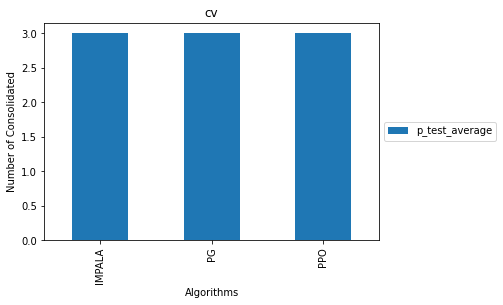

In [42]:
import matplotlib.pyplot as plt
plt.tight_layout()
plot_consolidated.plot(x='test_types', y='p_test_average', kind='bar')
plt.title("Variance of Rsource difference between differnt clouds")
plt.xlabel("Algorithms")
plt.ylabel("Number of Consolidated")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.savefig('./test-average-latency.pdf', bbox_inches='tight')
plt.show()